In [19]:
#!pip install wordcloud

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

from nltk.corpus import stopwords
from nltk import FreqDist, ngrams
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer


from collections import Counter
from nltk.corpus import stopwords

from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df = pd.read_csv('BA_cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_title     3598 non-null   object 
 1   cleaned_reviews  3598 non-null   object 
 2   stars            3598 non-null   float64
 3   review_date      3598 non-null   object 
 4   country          3598 non-null   object 
 5   seat_type        3598 non-null   object 
 6   verified         3598 non-null   bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 172.3+ KB


In [3]:
df.shape

(3598, 7)

In [4]:
df.head()

,review_title,cleaned_reviews,stars,review_date,country,seat_type,verified
0,“A very poor experience”,visa issue hence debarred flying ground staff ...,1.0,2024-11-05,India,Premium Economy,True
1,"""food and beverages being targeted""",singapore heathrow ba two choice route economy...,6.0,2024-11-05,United Kingdom,Business Class,True
2,"""never fly with them again""",recently travelled munich london british airwa...,1.0,2024-11-03,United Kingdom,Economy Class,True
3,"""still have not heard any updates""",verified paid seat b flight heathrow boston pa...,3.0,2024-11-03,United States,Premium Economy,False
4,"""cabin crew were nice""",verified flight bad although inflight entertai...,7.0,2024-11-03,United Kingdom,Economy Class,False


In [5]:
print("Unique values in 'review_title':", df['review_title'].unique())


Unique values in 'review_title': ['“A very poor experience”' '"food and beverages being targeted"'
 '"never fly with them again"' ... '"supposed legacy airline"'
 '"staff amiable and present"' '"cannot fault the service"']


## Average overall rating of British Airways Service

In [6]:
df.stars.mean()

4.5864369093941075

In [60]:
df['country'].nunique()


72

In [63]:
# Group by country and count the total number of reviews for each country
country_review_count = df.groupby('country').size().reset_index(name='review_count')

# Sort countries by review count in descending order
country_review_count = country_review_count.sort_values(by='review_count', ascending=False)

# If you want the top N countries with the highest number of reviews, say top 10
top_10_countries = country_review_count.head(10)
print(top_10_countries)


           country  review_count
69  United Kingdom          2227
70   United States           427
1        Australia           145
9           Canada           114
22         Germany            66
58    South Africa            40
30         Ireland            37
62     Switzerland            37
42     Netherlands            31
56       Singapore            30


In [7]:
df.stars.value_counts()

stars
1.0     905
2.0     416
3.0     411
8.0     354
10.0    296
9.0     290
7.0     283
4.0     245
5.0     219
6.0     179
Name: count, dtype: int64

## Overall distribution of customer rating

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


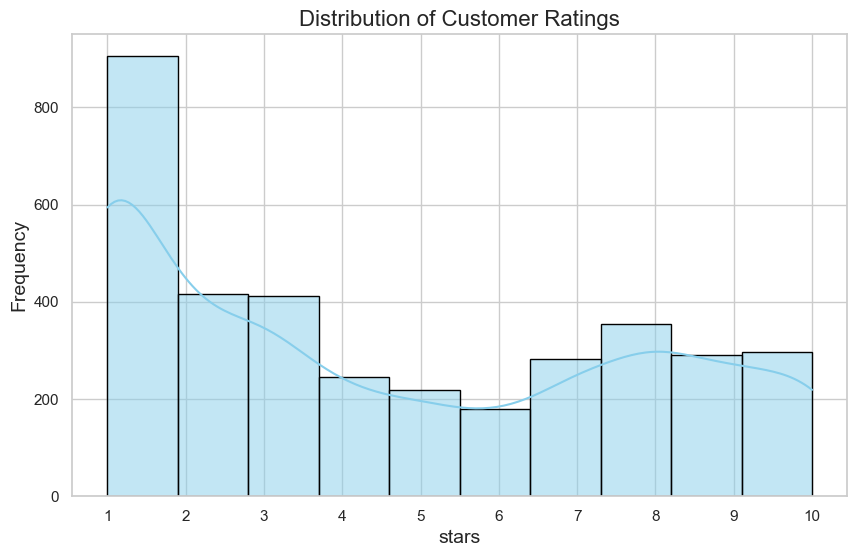

In [8]:

# Set plot style
sns.set(style="whitegrid")

# Plot the histogram and KDE for rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Customer Ratings", fontsize=16)
plt.xlabel("stars", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(1, 11))  # Assuming ratings are on a scale of 1 to 5

# Show plot
plt.show()


In [9]:
#!pip install textblob


In [10]:
from textblob import TextBlob

# Ensure the cleaned reviews column exists, then apply TextBlob sentiment analysis
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


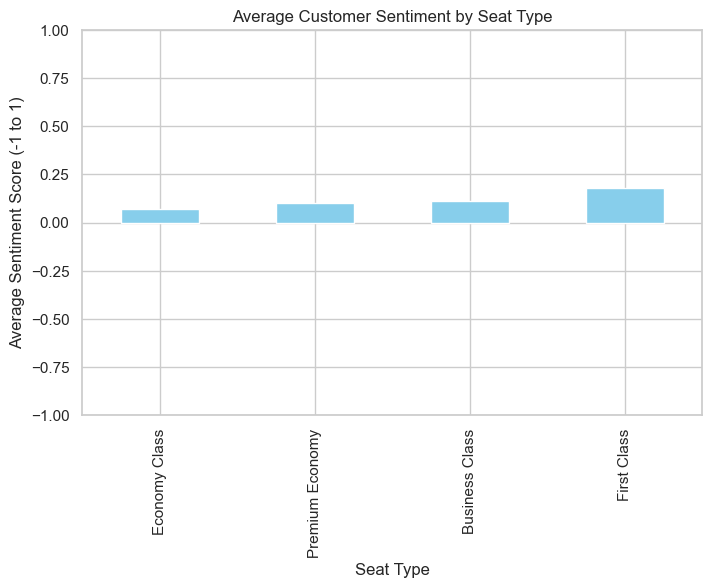

In [11]:
import matplotlib.pyplot as plt

# Drop rows with missing values in 'seat_type' or 'sentiment_score'
df = df.dropna(subset=['seat_type', 'sentiment_score'])

# Group by seat type and calculate the average sentiment score
seat_sentiment = df.groupby('seat_type')['sentiment_score'].mean().sort_values()

# Plot the average sentiment score by seat type
plt.figure(figsize=(8, 5))
seat_sentiment.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title("Average Customer Sentiment by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Average Sentiment Score (-1 to 1)")
plt.ylim(-1, 1)  # Sentiment scores range between -1 (negative) to +1 (positive)

# Display the plot
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_6632\666974626.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_rating = df['stars'].resample('Y').mean()


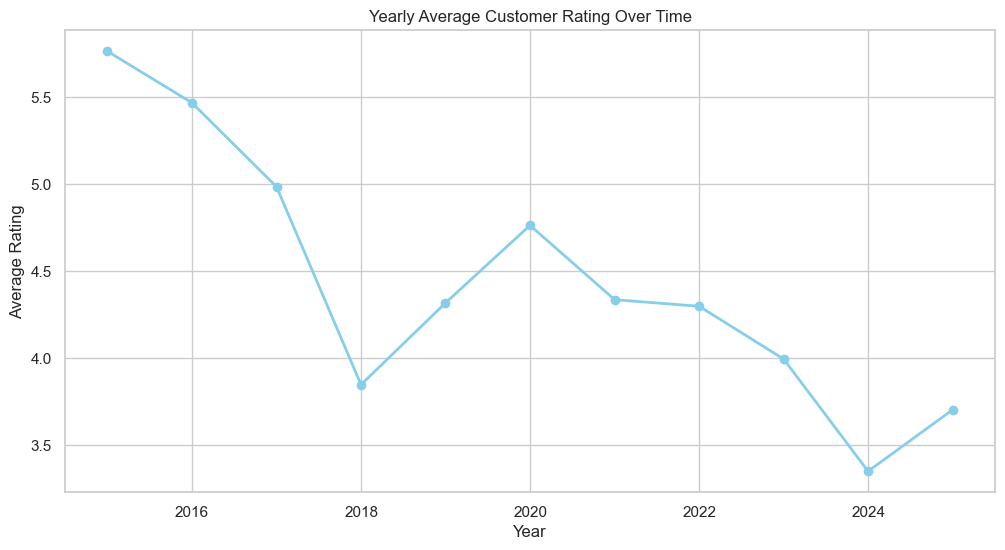

In [16]:

# Convert 'review_date' to datetime format (this is important)
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Set 'review_date' as the index to easily resample by year
df.set_index('review_date', inplace=True)

# Ensure there is no missing data in 'stars' (or change this to the appropriate rating column name)
#df = df.dropna(subset=['stars'])

# Resample the data by year and calculate the average rating
yearly_avg_rating = df['stars'].resample('Y').mean()

# Plot the yearly average rating over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_rating, marker='o', color='skyblue', linewidth=2)

# Add titles and labels
plt.title("Yearly Average Customer Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)

# Display the plot
plt.show()


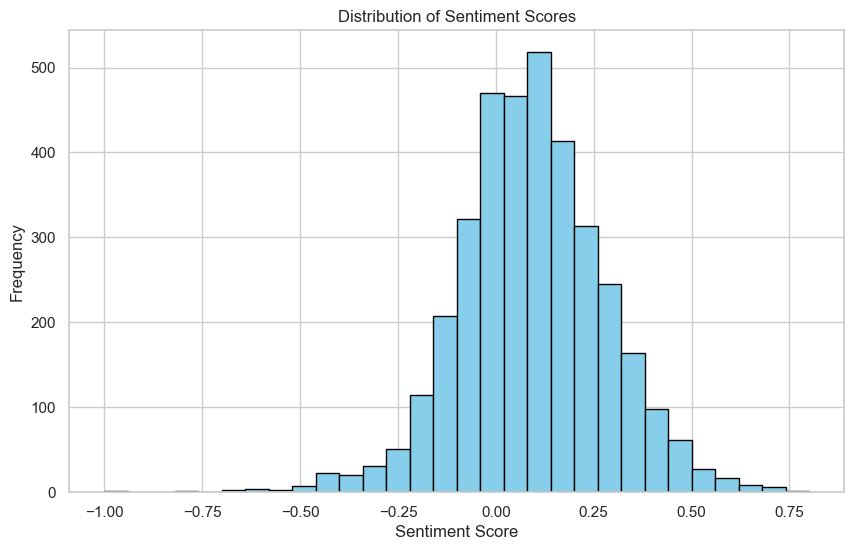

In [17]:


# Create a new column for sentiment scores
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot the sentiment scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['sentiment_score'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


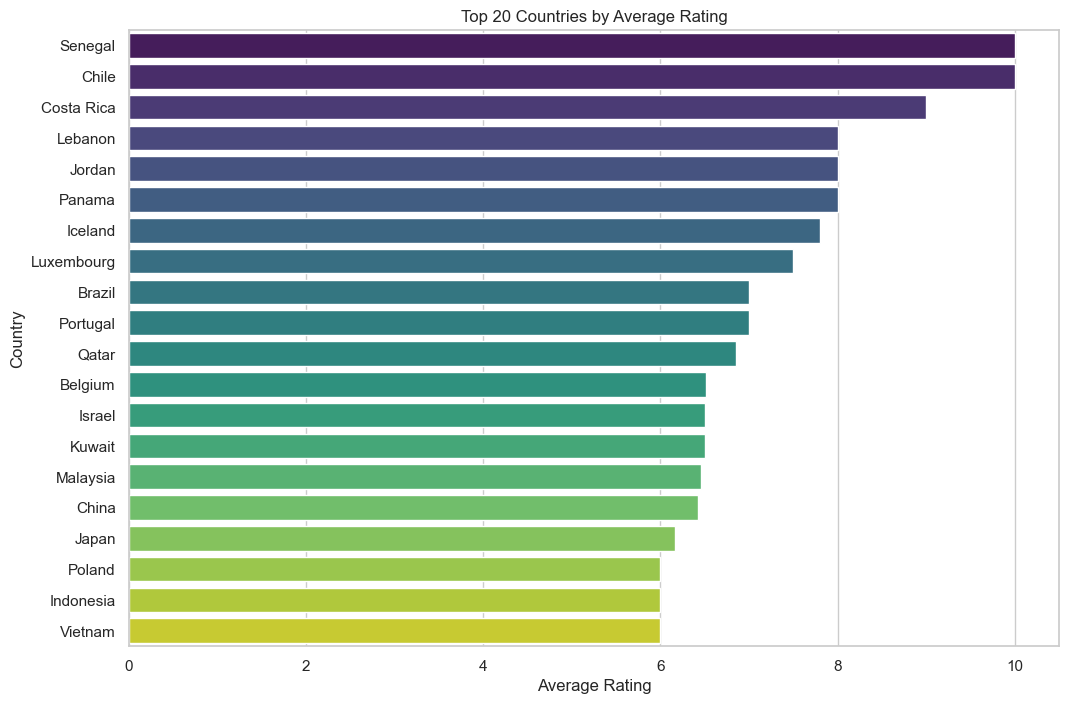

In [52]:

# Group by country and calculate the average rating
country_ratings = df.groupby('country')['stars'].mean().reset_index()

# Sort the countries by average rating (descending order) and select top 20
country_ratings = country_ratings.sort_values(by='stars', ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 countries
sns.barplot(x='stars', y='country', data=country_ratings, palette='viridis')

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Top 20 Countries by Average Rating')

# Show the plot
plt.show()


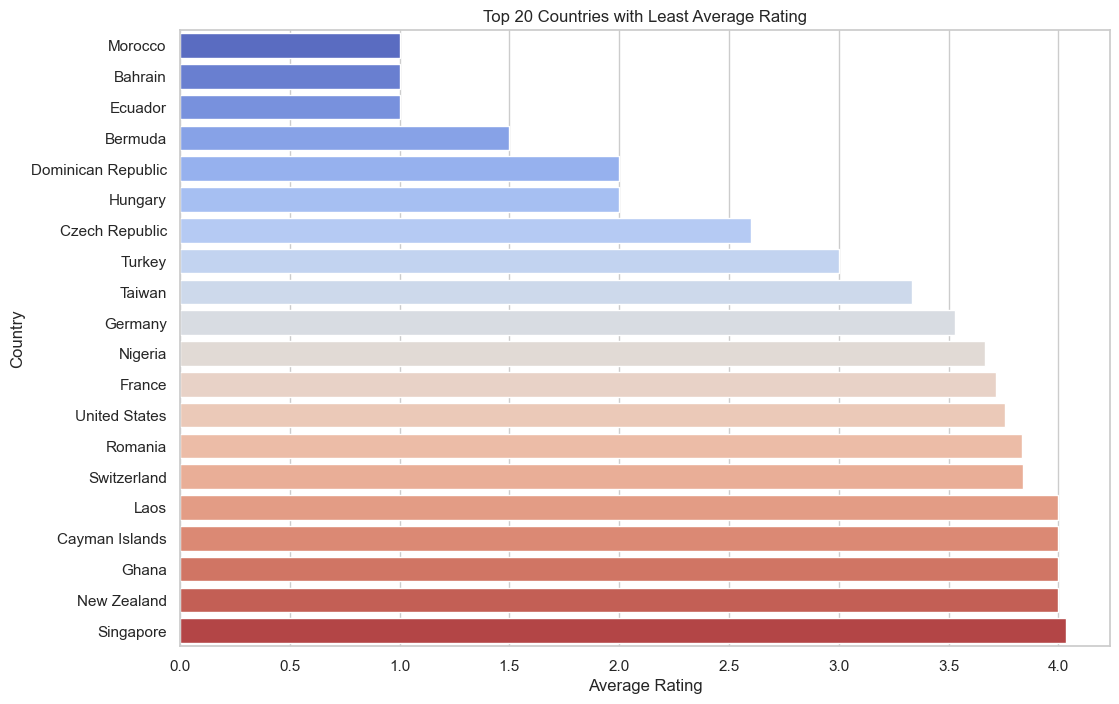

In [54]:

# Group by country and calculate the average rating
country_ratings = df.groupby('country')['stars'].mean().reset_index()

# Sort the countries by average rating in ascending order and select the bottom 20
country_ratings = country_ratings.sort_values(by='stars', ascending=True).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 countries with least ratings
sns.barplot(x='stars', y='country', data=country_ratings, palette='coolwarm')

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Top 20 Countries with Least Average Rating')

# Show the plot
plt.show()


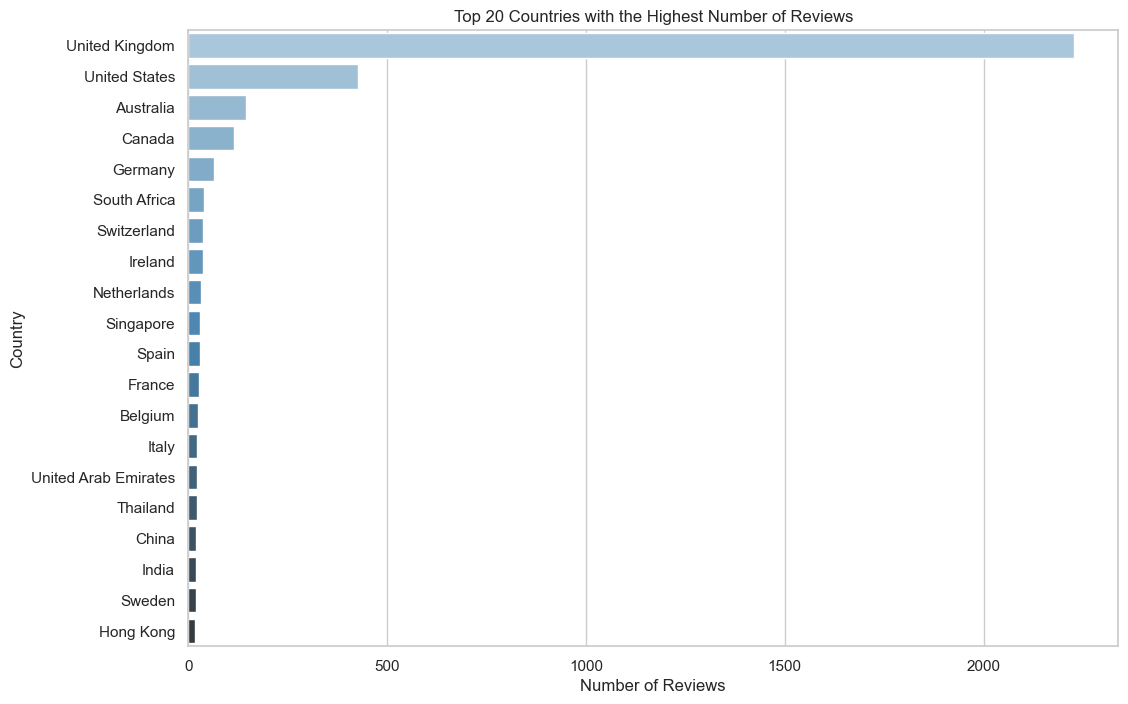

In [55]:
# Group by country and count the number of reviews
country_reviews = df['country'].value_counts().reset_index()

# Rename columns for clarity
country_reviews.columns = ['country', 'review_count']

# Select the top 20 countries with the highest number of reviews
country_reviews = country_reviews.head(20)

# Plotting the data
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 countries with the highest number of reviews
sns.barplot(x='review_count', y='country', data=country_reviews, palette='Blues_d')

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.title('Top 20 Countries with the Highest Number of Reviews')

# Show the plot
plt.show()


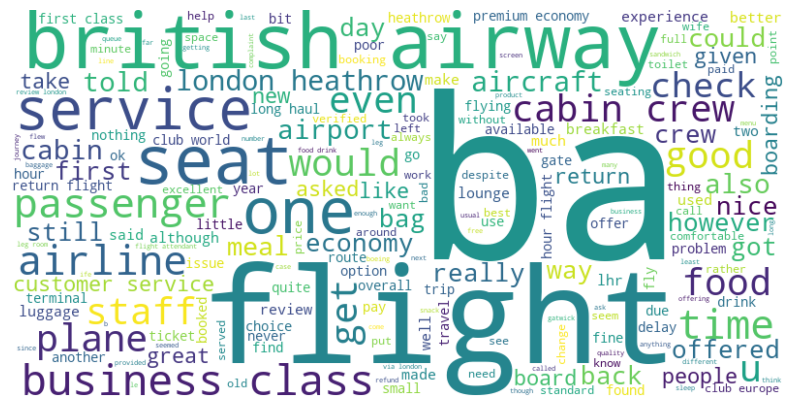

In [20]:
from wordcloud import WordCloud

# Combine all the reviews into one large text blob
text = " ".join(review for review in df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


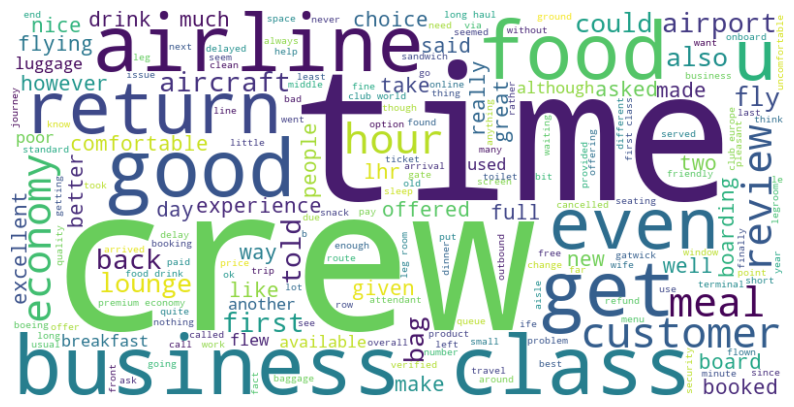

In [23]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all reviews into a single text blob
text = " ".join(review for review in df['cleaned_reviews'])

# Load stopwords from NLTK and convert to a set
stopwords_set = set(stopwords.words('english'))

# Add custom stopwords specific to your dataset
custom_stopwords = stopwords_set.union({"british", "airway", "flight", "london", "heathrow", "ba", "service", "still", 
                                        "passenger", "seat", "plane", "check", "staff", "cabin", "would", "say", 
                                        "despite", "find", "got", "ONE"})

# Generate the word cloud with custom stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


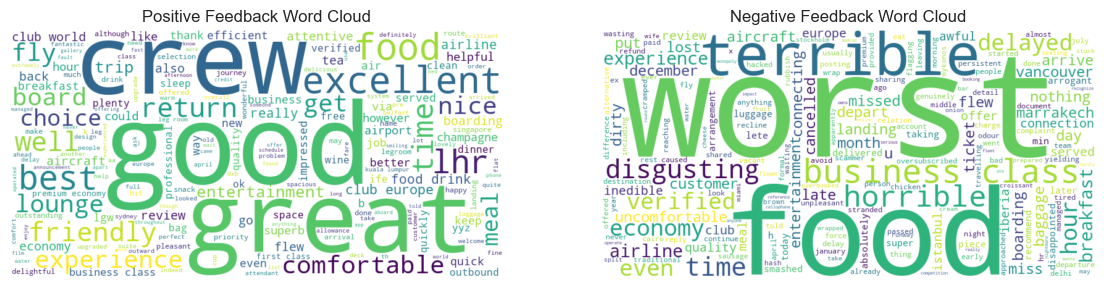

In [24]:
# Extract positive and negative reviews based on sentiment score
positive_reviews = df[df['sentiment_score'] > 0.5]['cleaned_reviews']
negative_reviews = df[df['sentiment_score'] < -0.5]['cleaned_reviews']

# Combine the reviews for positive and negative sentiment
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', width=800, height=400).generate(negative_text)

# Display the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Feedback Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Feedback Word Cloud")
plt.axis('off')

plt.show()


## Word Frequency Analysis with N-grams

In [29]:

# Combine all reviews into a single text column, if needed
all_reviews = " ".join(review for review in df['cleaned_reviews'].dropna())

# Set up the CountVectorizer for bigrams (3-grams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Get the bigram frequency as a dictionary
bigram_counts = X.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigram_features, bigram_counts))

# Sort and print the top 10 most common bigrams
top_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Bigrams:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")


Top 10 Bigrams:
review london heathrow: 112
business class seat: 110
british airway flight: 106
long haul flight: 98
flew british airway: 96
world traveller plus: 78
fly british airway: 77
heathrow british airway: 75
flight british airway: 69
flight delayed hour: 67


In [30]:
import matplotlib.pyplot as plt

# trigram terms and their frequencies for plotting
trigrams, trigram_frequencies = zip(*top_trigrams)

# Plot the top trigrams
plt.figure(figsize=(10, 6))
plt.barh(trigrams, trigram_frequencies, color='salmon')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in Reviews')
plt.gca().invert_yaxis()
plt.show()


NameError: name 'top_trigrams' is not defined

In [31]:


# Combine all reviews into a single text column, if needed
all_reviews = " ".join(review for review in df['cleaned_reviews'].dropna())

# Set up the CountVectorizer for 4-grams
vectorizer = CountVectorizer(ngram_range=(4, 4), stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Get the 4-gram frequency as a dictionary
fourgram_counts = X.sum(axis=0).A1
fourgram_features = vectorizer.get_feature_names_out()
fourgram_freq = dict(zip(fourgram_features, fourgram_counts))

# Sort and print the top 10 most common 4-grams
top_fourgrams = sorted(fourgram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 4-Grams:")
for fourgram, freq in top_fourgrams:
    print(f"{fourgram}: {freq}")


Top 10 4-Grams:
london heathrow british airway: 49
british airway business class: 40
review flew british airway: 25
flew british airway london: 22
british airway london heathrow: 21
british airway customer service: 19
business class british airway: 18
review flew london heathrow: 16
flight left time arrived: 14
british airway club europe: 13


In [32]:


# Calculate sentiment score for each review
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# List of top 4-grams from the previous analysis
top_fourgrams = [
    "london heathrow british airway", 
    "british airway business class", 
    "review flew british airway", 
    "flew british airway london", 
    "british airway london heathrow", 
    "british airway customer service", 
    "business class british airway", 
    "review flew london heathrow", 
    "flight left time arrived", 
    "british airway club europe"
]

# Calculate average sentiment for each 4-gram
for fourgram in top_fourgrams:
    # Filter reviews containing the 4-gram
    reviews_with_fourgram = df[df['cleaned_reviews'].str.contains(fourgram)]
    # Calculate average sentiment score
    avg_sentiment = reviews_with_fourgram['sentiment_score'].mean()
    print(f"{fourgram}: Average Sentiment Score = {avg_sentiment:.2f}")


london heathrow british airway: Average Sentiment Score = 0.07
british airway business class: Average Sentiment Score = 0.03
review flew british airway: Average Sentiment Score = 0.06
flew british airway london: Average Sentiment Score = 0.09
british airway london heathrow: Average Sentiment Score = 0.11
british airway customer service: Average Sentiment Score = 0.00
business class british airway: Average Sentiment Score = 0.01
review flew london heathrow: Average Sentiment Score = 0.00
flight left time arrived: Average Sentiment Score = 0.19
british airway club europe: Average Sentiment Score = 0.09


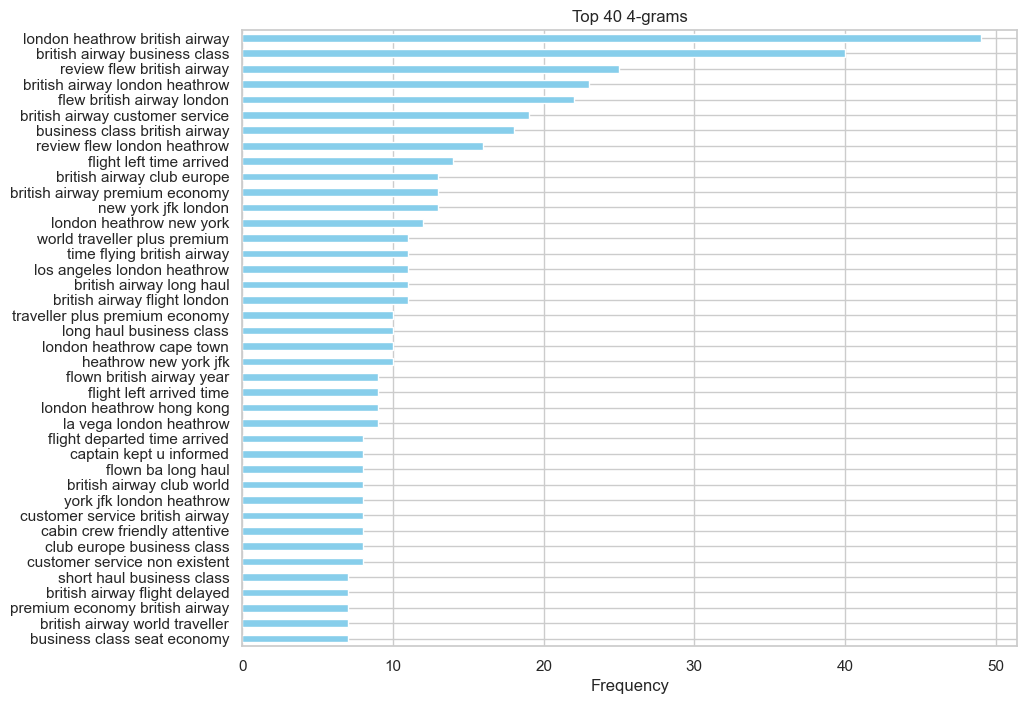

In [33]:

reviews = " ".join(df['cleaned_reviews'].dropna())  # Join all reviews into a single text

# Custom stopwords (can add more if needed)
stopwords = set(ENGLISH_STOP_WORDS)

# Split the text of all reviews into a list of words and remove stopwords
words = [word for word in reviews.split() if word.lower() not in stopwords]

def plot_top_ngrams(words, n=4, top_n=10):
    """
    Plots the top N-grams based on frequency.

    Parameters:
    - words (list): The list of words to analyze.
    - n (int): The length of the N-grams.
    - top_n (int): Number of top N-grams to display.
    """
    # Generate N-grams
    n_grams = ngrams(words, n)
    
    # Calculate frequency distribution
    ngram_freq = FreqDist(n_grams).most_common(top_n)
    
    # Join words in N-grams for better readability
    ngram_freq_dict = {' '.join(ngram): freq for ngram, freq in ngram_freq}
    
    # Convert to Pandas Series for plotting
    ngram_series = pd.Series(ngram_freq_dict)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    ngram_series.sort_values().plot(kind='barh', color='skyblue')
    plt.xlabel("Frequency")
    plt.title(f"Top {top_n} {n}-grams")
    plt.show()

# Example usage: Plot top 10 4-grams
plot_top_ngrams(words, n=4, top_n=40)


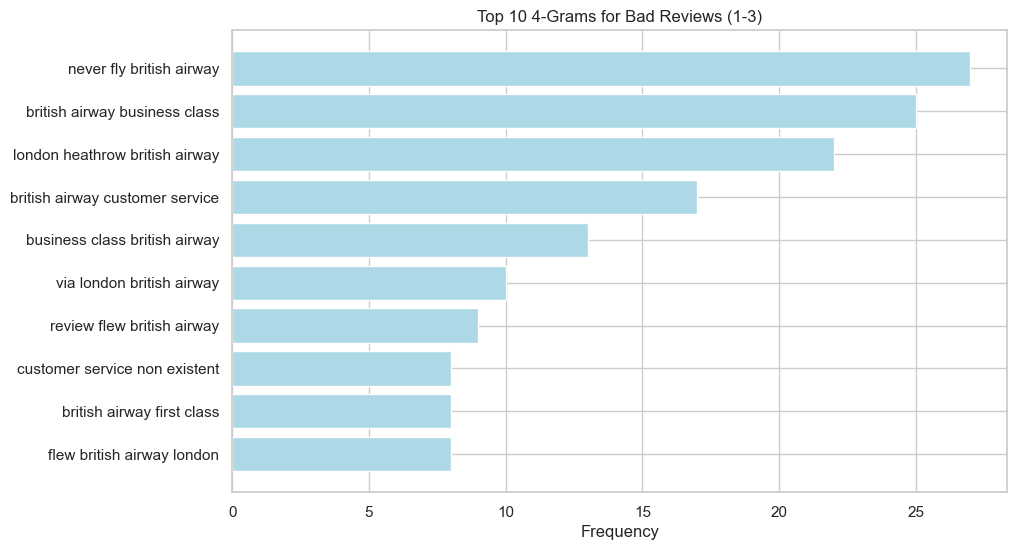

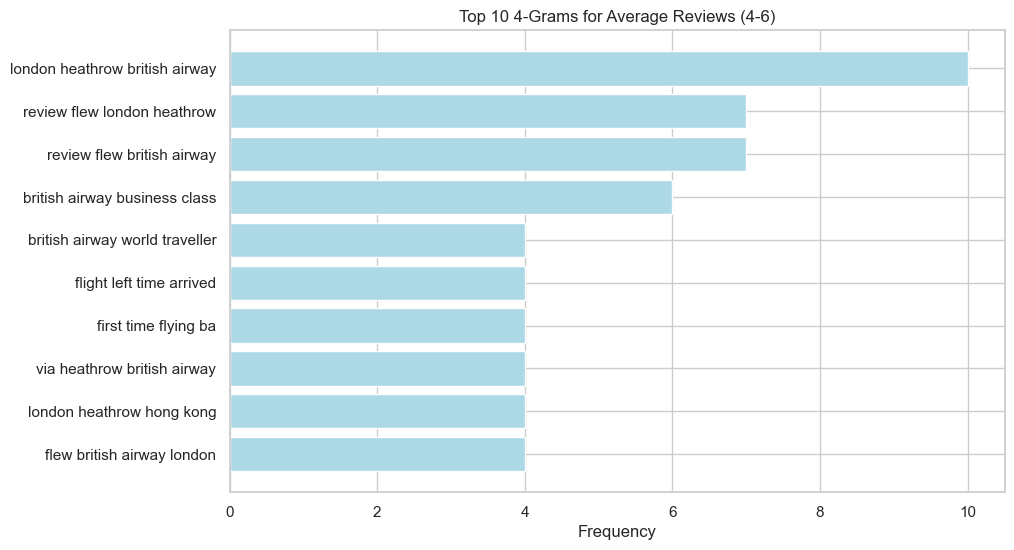

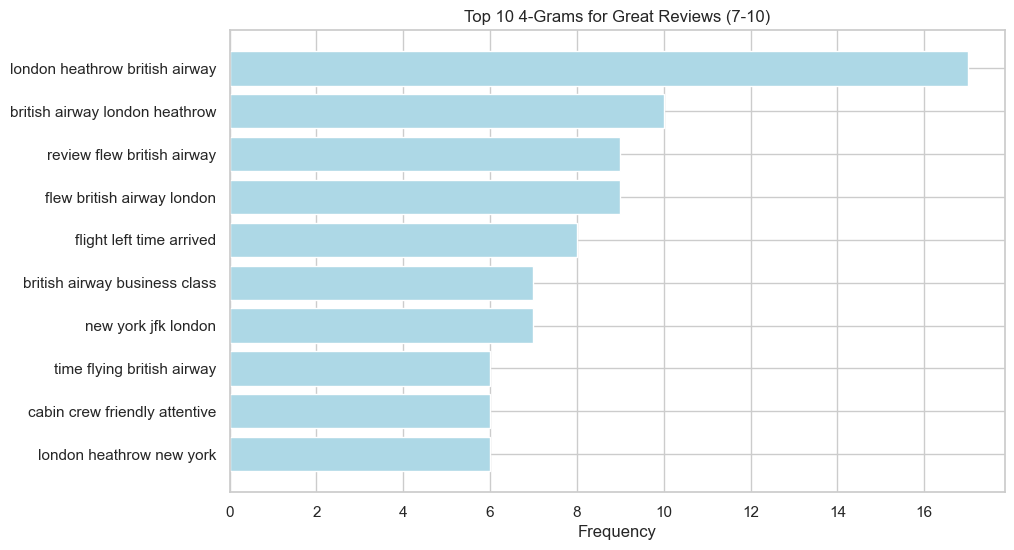

In [66]:
# Partition reviews into three categories based on ratings
ratings_1_3 = df[df['stars'].isin([1, 2, 3])]
ratings_4_6 = df[df['stars'].isin([4, 5, 6])]
ratings_7_10 = df[df['stars'].isin([7, 8, 9, 10])]

# Join the cleaned reviews into one large text for each rating category
reviews_1_3 = " ".join(ratings_1_3['cleaned_reviews'].dropna())
reviews_4_6 = " ".join(ratings_4_6['cleaned_reviews'].dropna())
reviews_7_10 = " ".join(ratings_7_10['cleaned_reviews'].dropna())

# Split the text into words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

# Remove stopwords (optional but helps with clarity)
stopwords_list = stopwords.words("english")

# Filter out stopwords from the word lists
words_1_3 = [word for word in words_1_3 if word not in stopwords_list]
words_4_6 = [word for word in words_4_6 if word not in stopwords_list]
words_7_10 = [word for word in words_7_10 if word not in stopwords_list]

# Function to get frequency of N-grams (e.g., 4-grams)
def get_ngram_freq(words, n=4):
    ngrams = zip(*[words[i:] for i in range(n)])  # Create n-grams
    ngram_list = [' '.join(ngram) for ngram in ngrams]  # Join words in n-grams
    return Counter(ngram_list)

# Get the 4-gram frequencies for each category
ngrams_1_3 = get_ngram_freq(words_1_3, 4)
ngrams_4_6 = get_ngram_freq(words_4_6, 4)
ngrams_7_10 = get_ngram_freq(words_7_10, 4)

# Get the top 10 4-grams for each category
top_ngrams_1_3 = ngrams_1_3.most_common(10)
top_ngrams_4_6 = ngrams_4_6.most_common(10)
top_ngrams_7_10 = ngrams_7_10.most_common(10)

# Create a function for plotting the top 4-grams
def plot_top_ngrams(top_ngrams, title):
    ngram_terms, ngram_counts = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_terms, ngram_counts, color='lightblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the top 4-gram at the top
    plt.show()

# Plot the top 10 4-grams for each rating category
plot_top_ngrams(top_ngrams_1_3, 'Top 10 4-Grams for Bad Reviews (1-3)')
plot_top_ngrams(top_ngrams_4_6, 'Top 10 4-Grams for Average Reviews (4-6)')
plot_top_ngrams(top_ngrams_7_10, 'Top 10 4-Grams for Great Reviews (7-10)')


In [46]:

# Partition reviews into three categories based on ratings
ratings_1_3 = df[df['stars'].isin([1, 2, 3])]
ratings_4_6 = df[df['stars'].isin([4, 5, 6])]
ratings_7_10 = df[df['stars'].isin([7, 8, 9, 10])]

# Join the cleaned reviews into one large text for each rating category
reviews_1_3 = " ".join(ratings_1_3['cleaned_reviews'].dropna())
reviews_4_6 = " ".join(ratings_4_6['cleaned_reviews'].dropna())
reviews_7_10 = " ".join(ratings_7_10['cleaned_reviews'].dropna())

# Split the text into words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

# Remove stopwords (optional but helps with clarity)
stopwords_list = stopwords.words("english")

# Filter out stopwords from the word lists
words_1_3 = [word for word in words_1_3 if word not in stopwords_list]
words_4_6 = [word for word in words_4_6 if word not in stopwords_list]
words_7_10 = [word for word in words_7_10 if word not in stopwords_list]

# Function to get frequency of N-grams (e.g., 4-grams)
def get_ngram_freq(words, n=4):
    ngrams = zip(*[words[i:] for i in range(n)])  # Create n-grams
    ngram_list = [' '.join(ngram) for ngram in ngrams]  # Join words in n-grams
    return Counter(ngram_list)

# Get the 4-gram frequencies for each category
ngrams_1_3 = get_ngram_freq(words_1_3, 4)
ngrams_4_6 = get_ngram_freq(words_4_6, 4)
ngrams_7_10 = get_ngram_freq(words_7_10, 4)

# Print the top 10 most common 4-grams for each rating group
print("Top 10 4-Grams for Ratings 1-3:")
print(ngrams_1_3.most_common(10))

print("\nTop 10 4-Grams for Ratings 4-6:")
print(ngrams_4_6.most_common(10))

print("\nTop 10 4-Grams for Ratings 7-10:")
print(ngrams_7_10.most_common(10))


Top 10 4-Grams for Ratings 1-3:
[('never fly british airway', 27), ('british airway business class', 25), ('london heathrow british airway', 22), ('british airway customer service', 17), ('business class british airway', 13), ('via london british airway', 10), ('review flew british airway', 9), ('customer service non existent', 8), ('british airway first class', 8), ('flew british airway london', 8)]

Top 10 4-Grams for Ratings 4-6:
[('london heathrow british airway', 10), ('review flew london heathrow', 7), ('review flew british airway', 7), ('british airway business class', 6), ('british airway world traveller', 4), ('flight left time arrived', 4), ('first time flying ba', 4), ('via heathrow british airway', 4), ('london heathrow hong kong', 4), ('flew british airway london', 4)]

Top 10 4-Grams for Ratings 7-10:
[('london heathrow british airway', 17), ('british airway london heathrow', 10), ('review flew british airway', 9), ('flew british airway london', 9), ('flight left time arr

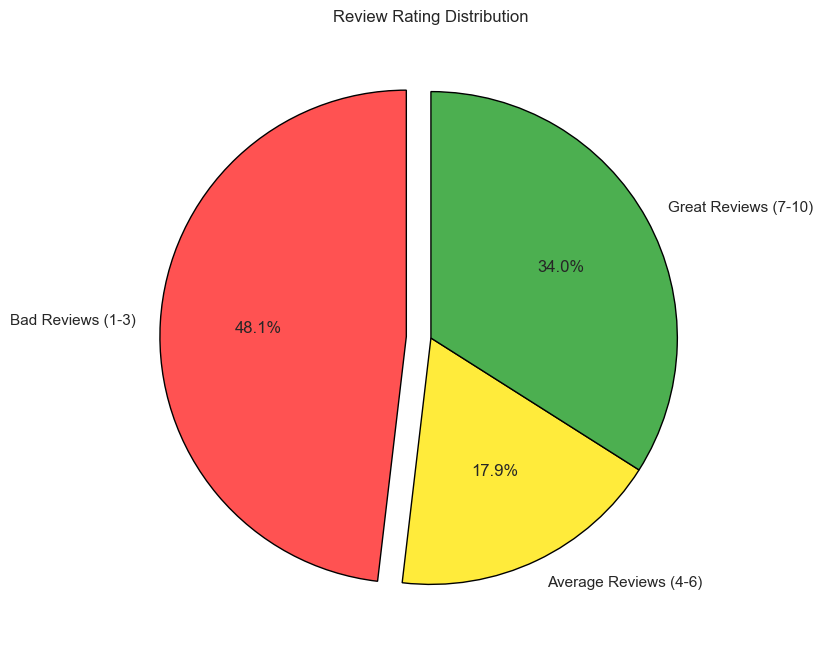

In [64]:
import matplotlib.pyplot as plt

# Count the number of reviews in each category
count_1_3 = len(ratings_1_3)
count_4_6 = len(ratings_4_6)
count_7_10 = len(ratings_7_10)

# Prepare data for the pie chart
labels = ['Bad Reviews (1-3)', 'Average Reviews (4-6)', 'Great Reviews (7-10)']
sizes = [count_1_3, count_4_6, count_7_10]
colors = ['#FF5252', '#FFEB3B', '#4CAF50']  # Red for Bad, Yellow for Average, Green for Good
explode = (0.1, 0, 0)  # Slightly explode the 'Bad' category slice for emphasis

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Review Rating Distribution')

# Display the pie chart
plt.show()


In [68]:
#!pip install gensim nltk scikit-learn

In [70]:


# Load your data
# Assuming your DataFrame is called df and contains a column 'cleaned_reviews'
df = pd.DataFrame({'cleaned_reviews': [
    # Example reviews for testing; replace with df['cleaned_reviews']
    "Great service but delayed flight",
    "Very uncomfortable seats, not recommended",
    "Friendly staff and good food",
    "Flight delayed, but good service on board",
    "Seats were very cramped, not enough legroom"
]})

# Text preprocessing
stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lower text
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Preprocess reviews
df['tokens'] = df['cleaned_reviews'].apply(preprocess)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# LDA Model - Choose the number of topics (e.g., 3-5 based on the data)
num_topics = 3
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Display topics and top words in each topic
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.176*"seats" + 0.173*"recommended" + 0.173*"uncomfortable" + 0.044*"delayed" + 0.044*"service"
Topic 2: 0.171*"good" + 0.098*"board" + 0.098*"staff" + 0.098*"friendly" + 0.098*"food"
Topic 3: 0.115*"flight" + 0.115*"service" + 0.115*"delayed" + 0.114*"great" + 0.114*"legroom"


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Convert reviews to a TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['cleaned_reviews'].dropna())

# Apply NMF with a specified number of topics
nmf = NMF(n_components=3, random_state=42)
nmf_topics = nmf.fit_transform(tfidf)

# Display top words in each topic
for idx, topic in enumerate(nmf.components_):
    print(f"Topic {idx+1}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:][::-1]])


Topic 1:  ['service', 'flight', 'delayed', 'good', 'seats']
Topic 2:  ['seats', 'service', 'good', 'flight', 'delayed']
Topic 3:  ['good', 'service', 'seats', 'flight', 'delayed']
